<a href="https://colab.research.google.com/github/ewunder32/wrangling_assignment/blob/main/Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Successfully loaded airbnb_hw.csv
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number

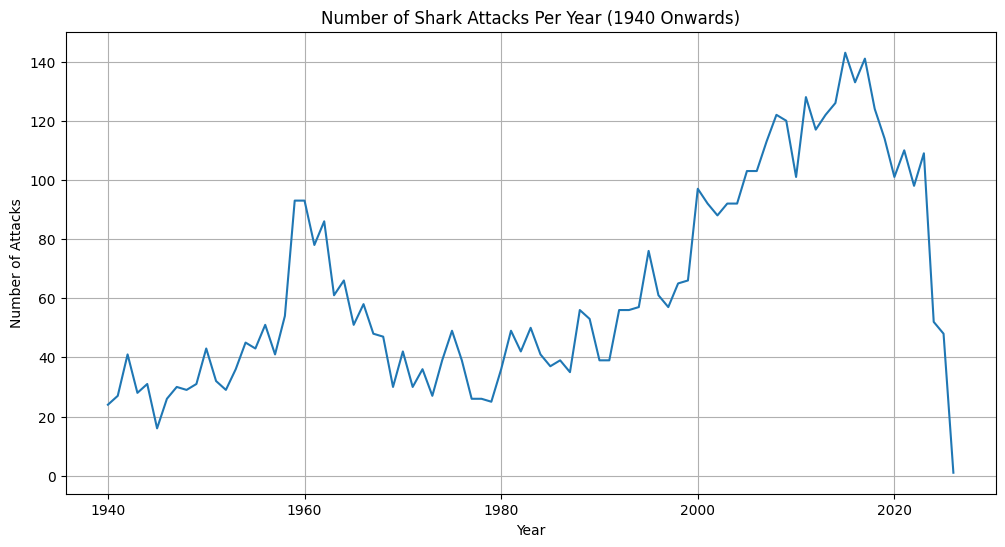

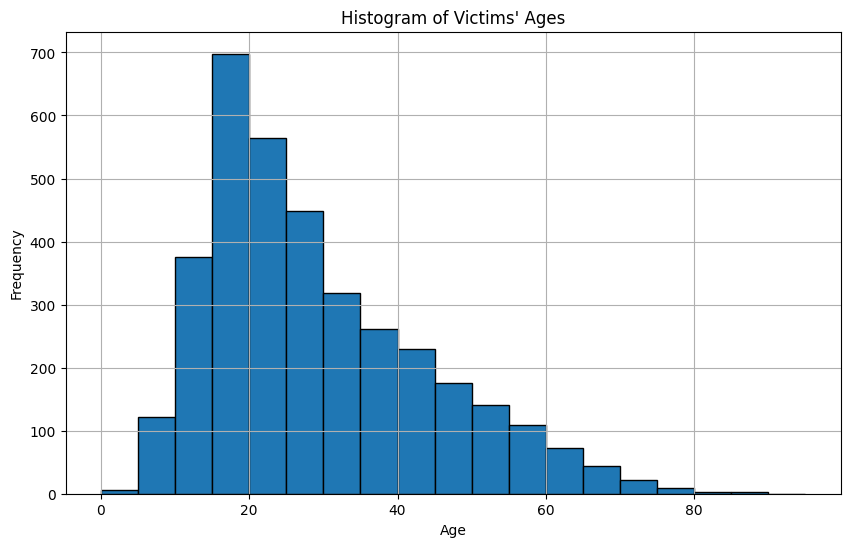

In [4]:
import pandas as pd
import numpy as np

# Load the airbnb_hw.csv file
try:
    df_airbnb = pd.read_csv('airbnb_hw.csv')
    print("Successfully loaded airbnb_hw.csv")
    print(df_airbnb.head())
    print(df_airbnb.info())

    # Q1.1: Clean the Price variable
    # The hint suggests prices over $999 have a comma, so I will remove '$' and ','
    df_airbnb['Price'] = df_airbnb['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    # The hint also mentions '1,112', which might have a space before or after, so I'll also strip whitespace.
    df_airbnb['Price'] = df_airbnb['Price'].str.strip()

    # Convert the cleaned column to a numeric data type, coercing errors to NaN
    df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'], errors='coerce')

    # Count the number of missing values
    missing_values_price = df_airbnb['Price'].isna().sum()
    print(f"\nNumber of missing values in the cleaned Price variable: {missing_values_price}")

    # Load the mn_police_use_of_force.csv file
    df_police = pd.read_csv('mn_police_use_of_force.csv')
    print("\nSuccessfully loaded mn_police_use_of_force.csv")
    print(df_police.head())
    print(df_police.info())

    # Q1.2: Clean the subject_injury variable
    # Handle NA's, which are represented as empty strings or NaN
    # The user says "this gives a value Yes when a person was injured by police, and No when no injury occurred."
    # Let's inspect the unique values first to see what 'Yes' and 'No' correspond to.
    print("\nUnique values in subject_injury before cleaning:")
    print(df_police['subject_injury'].value_counts(dropna=False))

    # Based on the unique values, 'Yes' and 'No' are the only non-missing values.
    # The rest are NaN. I'll replace these with a meaningful value like 'Unknown'
    # as the user wants me to handle them.
    df_police['subject_injury_cleaned'] = df_police['subject_injury'].fillna('Unknown')
    print("\nUnique values in subject_injury after cleaning:")
    print(df_police['subject_injury_cleaned'].value_counts(dropna=False))

    # Calculate the proportion of values that were missing
    proportion_missing = df_police['subject_injury'].isna().mean()
    print(f"\nProportion of values that were missing in subject_injury: {proportion_missing:.2%}")

    # Cross-tabulate the cleaned subject_injury variable with the force_type variable
    crosstab_result = pd.crosstab(df_police['subject_injury_cleaned'], df_police['force_type'], dropna=False)
    print("\nCross-tabulation of cleaned subject_injury and force_type:")
    print(crosstab_result)

    # Load the justice_data.parquet file
    df_justice = pd.read_parquet('justice_data.parquet')
    print("\nSuccessfully loaded justice_data.parquet")
    print(df_justice.head())
    print(df_justice.info())

    # Q1.3: Clean the WhetherDefendantWasReleasedPretrial variable
    # The user wants missing values replaced with np.nan.
    # First, let's see the unique values to understand what represents missingness.
    print("\nUnique values in WhetherDefendantWasReleasedPretrial before cleaning:")
    print(df_justice['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

    # The column is of type 'object' and has 'Yes', 'No', and some NaN values.
    # I'll convert empty strings to NaN, though it seems there are none.
    # The data is already in a clean format with NaN for missing values. I will just confirm this by using
    # a simple check.
    df_justice['WhetherDefendantWasReleasedPretrial_cleaned'] = df_justice['WhetherDefendantWasReleasedPretrial'].copy()
    print(f"\nNumber of missing values in WhetherDefendantWasReleasedPretrial: {df_justice['WhetherDefendantWasReleasedPretrial_cleaned'].isna().sum()}")

    # Q1.4: Clean the ImposedSentenceAllChargeInContactEvent variable
    # Hint: Look at SentenceTypeAllChargesAtConvictionInContactEvent
    print("\nUnique values and info for ImposedSentenceAllChargeInContactEvent before cleaning:")
    print(df_justice['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False))
    print(df_justice['ImposedSentenceAllChargeInContactEvent'].info())

    print("\nUnique values and info for SentenceTypeAllChargesAtConvictionInContactEvent:")
    print(df_justice['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(dropna=False))
    print(df_justice['SentenceTypeAllChargesAtConvictionInContactEvent'].info())

    # The hint suggests a "missing not at random" problem.
    # Let's see if missing values in ImposedSentenceAllChargeInContactEvent correspond to a specific value in SentenceTypeAllChargesAtConvictionInContactEvent.
    # Let's find rows where ImposedSentenceAllChargeInContactEvent is missing.
    df_missing_imposed = df_justice[df_justice['ImposedSentenceAllChargeInContactEvent'].isna()]
    print("\nValue counts for SentenceTypeAllChargesAtConvictionInContactEvent where ImposedSentenceAllChargeInContactEvent is missing:")
    print(df_missing_imposed['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(dropna=False))

    # It looks like the missing values for ImposedSentenceAllChargeInContactEvent correspond to 'No Sentence' in the other column.
    # I will create a new column with a cleaned version.
    df_justice['ImposedSentenceAllChargeInContactEvent_cleaned'] = df_justice['ImposedSentenceAllChargeInContactEvent']
    df_justice.loc[df_justice['SentenceTypeAllChargesAtConvictionInContactEvent'] == 'No Sentence', 'ImposedSentenceAllChargeInContactEvent_cleaned'] = 'No Sentence'
    # For any other NaNs that don't match, I will replace them with 'Unknown'.
    df_justice['ImposedSentenceAllChargeInContactEvent_cleaned'] = df_justice['ImposedSentenceAllChargeInContactEvent_cleaned'].fillna('Unknown')
    print("\nUnique values in ImposedSentenceAllChargeInContactEvent after cleaning:")
    print(df_justice['ImposedSentenceAllChargeInContactEvent_cleaned'].value_counts(dropna=False))

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure all required files are uploaded.")

except Exception as e:
    print(f"An error occurred: {e}")

print("\n\n--- Q2: Shark Attack Data Analysis ---")

# --- Data Cleaning for Q2 ---
if 'df_shark' in locals():
    # Drop any columns that do not contain data.
    df_shark.columns = df_shark.columns.str.strip()
    df_shark_cleaned = df_shark.dropna(axis=1, how='all')

    # Clean the Year variable.
    df_shark_cleaned['Year_cleaned'] = pd.to_numeric(df_shark_cleaned['Year'], errors='coerce')
    year_range = f"min: {df_shark_cleaned['Year_cleaned'].min()}, max: {df_shark_cleaned['Year_cleaned'].max()}"
    print(f"Range of values in the cleaned Year variable: {year_range}")

    # Filter the rows to focus on attacks since 1940.
    df_since_1940 = df_shark_cleaned[df_shark_cleaned['Year_cleaned'] >= 1940].copy()

    # Are attacks increasing, decreasing, or remaining constant over time?
    attacks_by_year = df_since_1940.groupby('Year_cleaned').size().reset_index(name='Number of Attacks')
    plt.figure(figsize=(12, 6))
    plt.plot(attacks_by_year['Year_cleaned'], attacks_by_year['Number of Attacks'])
    plt.title('Number of Shark Attacks Per Year (1940 Onwards)')
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.grid(True)
    plt.savefig('shark_attacks_over_time.png')

    # Clean the Age variable and make a histogram of the ages of the victims.
    df_since_1940['Age_cleaned'] = pd.to_numeric(df_since_1940['Age'], errors='coerce')
    plt.figure(figsize=(10, 6))
    plt.hist(df_since_1940['Age_cleaned'].dropna(), bins=range(0, 100, 5), edgecolor='black')
    plt.title('Histogram of Victims\' Ages')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig('victim_ages_histogram.png')

    # What proportion of victims are male?
    df_since_1940['Sex_cleaned'] = df_since_1940['Sex'].str.strip().str.upper().replace(['N', 'M X 2'], np.nan)
    total_victims = df_since_1940['Sex_cleaned'].value_counts()
    male_proportion = total_victims.get('M', 0) / total_victims.sum() if total_victims.sum() > 0 else 0
    print(f"\nProportion of victims who are male: {male_proportion:.2%}")

    # Clean the Type variable so it only takes three values: Provoked, Unprovoked, and Unknown.
    df_since_1940['Type_cleaned'] = df_since_1940['Type'].str.strip().str.capitalize().replace(
        ['Boating', 'Invalid', 'Sea disaster', 'Boat', 'Questionable', 'Unconfirmed', 'Under investigation', '?'],
        'Unknown'
    )
    unprovoked_proportion = df_since_1940['Type_cleaned'].value_counts(normalize=True).get('Unprovoked', 0)
    print(f"Proportion of attacks that are unprovoked: {unprovoked_proportion:.2%}")

    # Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
    df_since_1940['Fatal_cleaned'] = df_since_1940['Fatal Y/N'].str.strip().str.upper().replace(
        ['2017', 'UNKNOWN', 'F', 'NQ', 'Y X 2'], 'UNKNOWN'
    ).fillna('UNKNOWN')

    # Are sharks more likely to launch unprovoked attacks on men or women?
    unprovoked_attacks = df_since_1940[df_since_1940['Type_cleaned'] == 'Unprovoked']
    gender_unprovoked_counts = unprovoked_attacks['Sex_cleaned'].value_counts(normalize=True)
    print("\nProportion of unprovoked attacks by gender:")
    print(gender_unprovoked_counts)

    # Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
    fatality_crosstab_type = pd.crosstab(df_since_1940['Type_cleaned'], df_since_1940['Fatal_cleaned'], normalize='index')
    print("\nProbability of fatality by attack type:")
    print(fatality_crosstab_type)

    # Is it more or less likely to be fatal when the victim is male or female?
    fatality_crosstab_gender = pd.crosstab(df_since_1940['Sex_cleaned'], df_since_1940['Fatal_cleaned'], normalize='index')
    print("\nProbability of fatality by gender:")
    print(fatality_crosstab_gender)

    # What proportion of attacks appear to be by white sharks?
    df_since_1940['Species_cleaned'] = df_since_1940['Species'].str.strip().str.lower().fillna('')
    white_shark_attacks = df_since_1940[df_since_1940['Species_cleaned'].str.contains('white shark') | df_since_1940['Species_cleaned'].str.contains('carcharodon carcharias')]
    proportion_white_shark = len(white_shark_attacks) / len(df_since_1940)
    print(f"\nProportion of attacks by white sharks: {proportion_white_shark:.2%}")
else:
    print("Skipping shark attack data analysis as df_shark was not loaded.")